In [1]:
%%cpp -d

#include "sPhenixStyle.C"
#include "SaveCanvas.C"


In [2]:
SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

gSystem->Load("libg4eval.so");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
// const TString infile = "production-1-take2/18966.ALL.csv_DSTReader.root";
 const TString infile = "production-1-take2/ALL.ALL.csv_DSTReader.root";
//const TString infile = "production-2/ALL.ALL.csv_DSTReader.root";

// const TString infile = "production-1/18966.ALL.csv_DSTReader.root";
// const TString infile = "production-1/18966.5.csv_DSTReader.root";
    

In [4]:
TString chian_str = infile;
chian_str.ReplaceAll("ALL", "*");

TChain *T = new TChain("T");
const int n = T->Add(chian_str);

cout << "Loaded " << n << " root files with " << chian_str << endl;
assert(n > 0);

TFile *_file0 = NULL;
_file0 = new TFile;
_file0->SetName(infile);

Loaded 360 root files with production-1-take2/*.*.csv_DSTReader.root


In [5]:
T->Show(9005);

======> EVENT:9005
 n_G4HIT_SVTX    = 0
 n_G4HIT_MVTX    = 0
 n_G4HIT_EGEM_0  = 0
 n_G4HIT_EGEM_1  = 0
 n_G4HIT_EGEM_2  = 0
 n_G4HIT_EGEM_3  = 0
 n_G4HIT_FGEM_2  = 0
 n_G4HIT_FGEM_3  = 0
 n_G4HIT_FGEM_4  = 0
 n_G4HIT_FST_0   = 0
 n_G4HIT_FST_1   = 0
 n_G4HIT_FST_2   = 0
 n_G4HIT_FST_3   = 0
 n_G4HIT_FST_4   = 0
 n_G4HIT_CEMC    = 0
 n_G4HIT_HCALIN  = 0
 n_G4HIT_HCALOUT = 0
 n_G4HIT_FHCAL   = 0
 n_G4HIT_FEMC    = 0
 n_G4HIT_EEMC    = 0
 n_G4HIT_BH_1    = 0
 n_G4HIT_BH_FORWARD_PLUS = 0
 n_G4HIT_BH_FORWARD_NEG = 0
 n_PHG4Particle  = 1
 PHG4Particle    = 1
 PHG4Particle.fUniqueID = 0
 PHG4Particle.fBits = 33554432
 PHG4Particle.fname = gamma
 PHG4Particle.fpid = 22
 PHG4Particle.fpx = -2.61926e-09
 PHG4Particle.fpy = 4.56209e-10
 PHG4Particle.fpz = -1.6535e-08
 PHG4Particle.barcode = -1
 PHG4Particle.trkid = 1
 PHG4Particle.vtxid = 1
 PHG4Particle.parentid = 0
 PHG4Particle.primaryid = 1
 PHG4Particle.fe = 1.67474e-08
 n_PHG4VtxPoint  = 1
 PHG4VtxPoint    = 1
 PHG4VtxPoint.fUniqueID = 0
 P

In [6]:
// T->Scan("","n_G4HIT_MVTX>0");

Save TH1 hz_all
Save TH1 hz_all_10keV
Save TH1 hz


Info in <TCanvas::Print>: png file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_z.png has been created
Info in <TCanvas::SaveAs>: ROOT file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_z.root has been created
Info in <TCanvas::Print>: eps file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_z.eps has been created
Info in <TCanvas::Print>: SVG file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_z.svg has been created


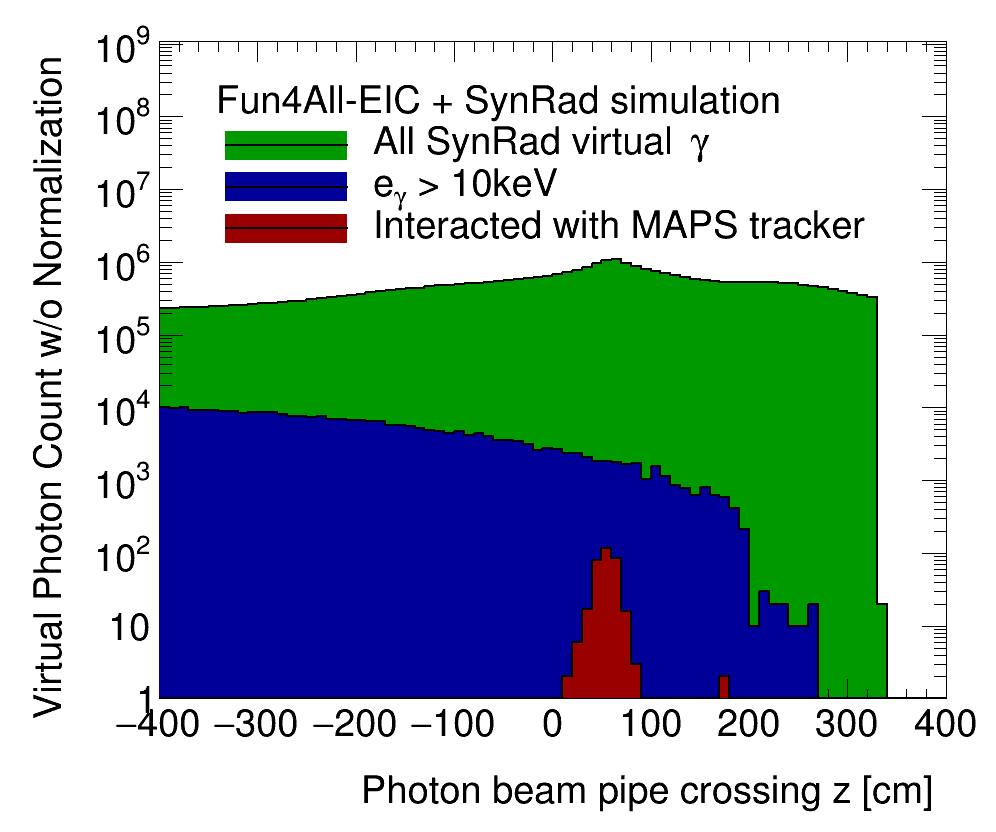

removed ‘production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_z.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_z.C has been generated


In [7]:
{
    TCanvas *c1 = new TCanvas("h_DSTReader_z", "h_DSTReader_z", 1000, 860);
    int idx = 1;
    TPad *p = nullptr;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogy();
    
    TH1*hz = new TH1F("hz","",80,-400,400);
    T->Draw("Sum$(PHG4VtxPoint.vz * (PHG4VtxPoint.id == 1))>>hz","n_G4HIT_MVTX>0","goff");
    
    TH1*hz_all = new TH1F("hz_all","Photons and MAPS hits;Photon beam pipe crossing z [cm];Virtual Photon Count w/o Normalization",80,-400,400);
    T->Draw("Sum$(PHG4VtxPoint.vz * (PHG4VtxPoint.id == 1)) >> hz_all","1","goff");
    
    TH1*hz_all_10keV = new TH1F("hz_all_10keV","",80,-400,400);
    T->Draw("Sum$(PHG4VtxPoint.vz * (PHG4VtxPoint.id == 1)) >> hz_all_10keV",
            "Sum$((PHG4Particle.trkid==1 && PHG4Particle.fe>10e-6) )","goff");
    
    hz_all->Draw();
    hz_all_10keV->Draw("same");
    hz->Draw("same");
    
    hz_all->SetFillColor(kGreen+2);
    hz_all_10keV->SetFillColor(kBlue+2);
    hz->SetFillColor(kRed+2);
    
    hz_all->GetYaxis()->SetRangeUser(1, hz_all->GetMaximum()*1000);
    
    
    TLegend *leg = new TLegend(.2, .7, .9, .9,   "Fun4All-EIC + SynRad simulation");
    leg->AddEntry(hz_all, "All SynRad virtual #gamma", "lf");
    leg->AddEntry(hz_all_10keV, "e_{#gamma} > 10keV", "lf");
    leg->AddEntry(hz, "Interacted with MAPS tracker", "lf");
    leg->Draw();

    c1->Draw();
    
    SaveCanvas(c1,
     TString(_file0->GetName()) + TString(c1->GetName()), true);
}

Info in <TCanvas::Print>: png file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_photonEnergy.png has been created


Save TH1 he_all
Save TH1 he_all_z
Save TH1 he


Info in <TCanvas::SaveAs>: ROOT file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_photonEnergy.root has been created
Info in <TCanvas::Print>: eps file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_photonEnergy.eps has been created
Info in <TCanvas::Print>: SVG file production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_photonEnergy.svg has been created


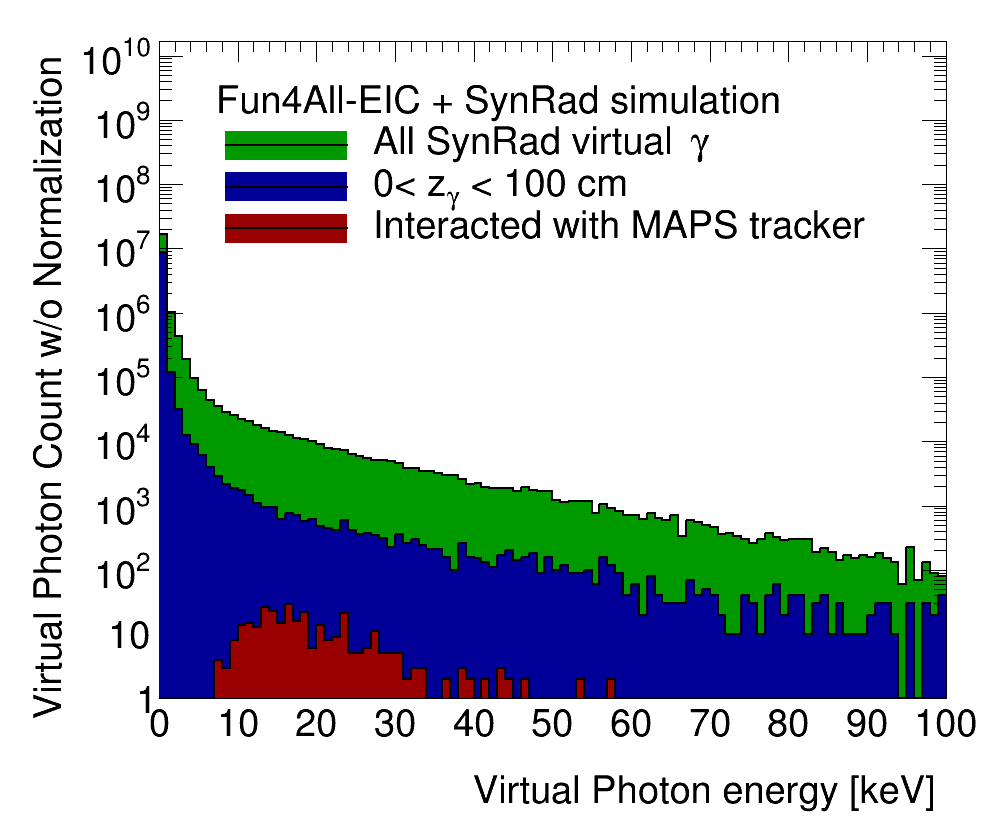

removed ‘production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_photonEnergy.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: production-1-take2/ALL.ALL.csv_DSTReader.rooth_DSTReader_photonEnergy.C has been generated


In [8]:
{
    TCanvas *c1 = new TCanvas("h_DSTReader_photonEnergy", "h_DSTReader_photonEnergy", 1000, 860);
    int idx = 1;
    TPad *p = nullptr;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogy();
    
    TH1*he = new TH1F("he",
                      "",
                      100,0,100);
    T->Draw("Sum$(PHG4Particle.fe * (PHG4Particle.trkid==1) )* 1e6>>he","n_G4HIT_MVTX>0","goff");
    
    TH1*he_all = new TH1F("he_all",
                          "Photons and MAPS hits;Virtual Photon energy [keV];Virtual Photon Count w/o Normalization",
                          100,0,100);
    T->Draw("Sum$(PHG4Particle.fe * (PHG4Particle.trkid==1))  * 1e6>> he_all","1","goff");
    
    TH1*he_all_z = new TH1F("he_all_z","",100,0,100);
    T->Draw("Sum$(PHG4Particle.fe * (PHG4Particle.trkid==1) ) * 1e6>> he_all_z",
            "abs(Sum$(PHG4VtxPoint.vz * (PHG4VtxPoint.id == 1)) - 50) < 50","goff");
    
    he_all->Draw();
    he_all_z->Draw("same");
    he->Draw("same");
    
    he_all->SetFillColor(kGreen+2);
    he_all_z->SetFillColor(kBlue+2);
    he->SetFillColor(kRed+2);
    
    he_all->GetYaxis()->SetRangeUser(1, he_all->GetMaximum()*1000);
    
    
    TLegend *leg = new TLegend(.2, .7, .9, .9,   "Fun4All-EIC + SynRad simulation");
    leg->AddEntry(he_all, "All SynRad virtual #gamma", "lf");
    leg->AddEntry(he_all_z, "0< z_{#gamma} < 100 cm", "lf");
    leg->AddEntry(he, "Interacted with MAPS tracker", "lf");
    leg->Draw();
    
    c1->Draw();
    
    SaveCanvas(c1,
     TString(_file0->GetName()) + TString(c1->GetName()), true);
}